<a href="https://colab.research.google.com/github/ShreshthSaxena/ML/blob/master/Hubspot-Community%20NLP%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#wordcloud
#avg length of title/content/answer
#avg number of answers to each post
#number of important terms/keywords in each category
#avg number of matching words in question and answer

In [ ]:
# import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
# plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Hubspot

Category                       no. of posts    no. of ans      ans/post       
Account_Settings               1311            4340            3.31           
CRM                            4647            15291           3.29           
Dashboards-Reporting           651             2305            3.54           
Gmail                          744             2844            3.82           
Mobile-Application             196             681             3.47           
Outlook                        655             2449            3.74           
Sales-Email                    848             2843            3.35           
Sales-Integration              478             1664            3.48           
Sales-Hubs-Tools               925             3188            3.45           
Tips-Tricks                    239             816             3.41           


[]

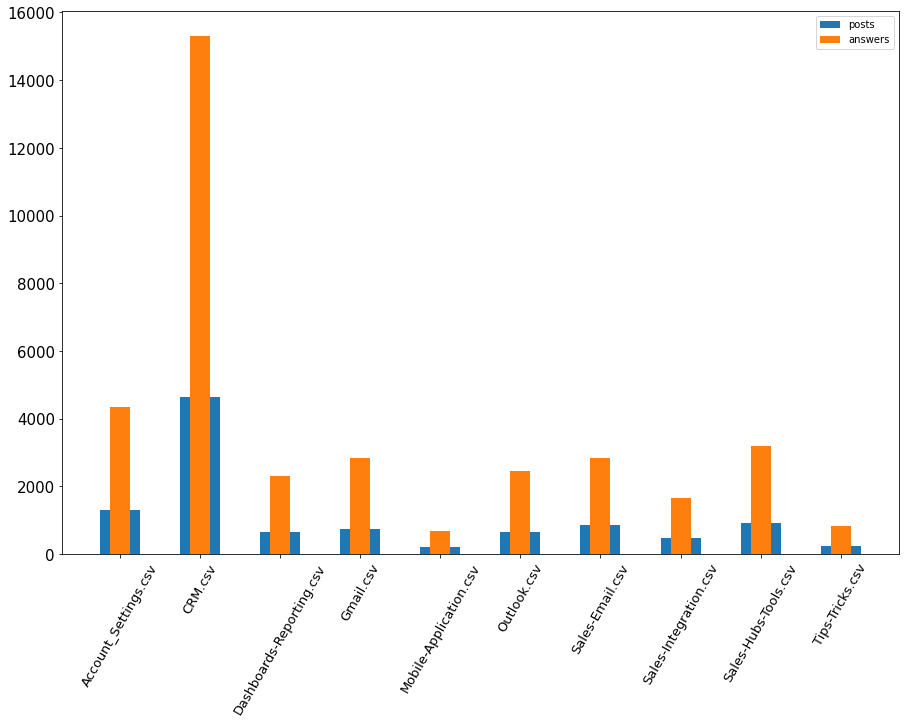

In [ ]:
print("{:<30} {:<15} {:<15} {:15}".format("Category", "no. of posts", "no. of ans", "ans/post"))
y2=[]
y1=[]
for f in os.listdir("/path"):
  df = pd.read_csv("/path/"+f)
  df.drop('Unnamed: 0', axis=1, inplace=True)
  df.drop_duplicates(inplace=True, ignore_index=True)
  ans = 0
  for row in df.iterrows():
    ans+=len(eval(row[1]["Answers"]))
  print("{:<30} {:<15} {:<15} {:<15}".format(f[:-4], df.shape[0], ans, round(ans/df.shape[0],2)))
  y1.append(df.shape[0])
  y2.append(ans)
  # print(f,"no of posts: ",df.shape[0],"total no. of answers: ",ans)
X = os.listdir("/path")
plt.figure(figsize=(15,10))
# ax = fig.add_axes([0,0,1,1])
plt.bar(X , y1, width = 0.5)
plt.bar(X , y2, width = 0.25)
plt.xticks(rotation=60, fontsize=13)
plt.yticks(fontsize = 15)
plt.legend(labels = ["posts","answers"])
plt.plot()

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
fin = pd.Series()

for f in os.listdir("/path"):
  df = pd.read_csv("/path/"+f)
  df.drop('Unnamed: 0', axis=1, inplace=True)
  df.drop_duplicates(inplace=True, ignore_index=True)
  df['combined'] = df["Title"]+df["Content"]+df["Answers"]
  df['tokenized'] = df['combined'].apply(word_tokenize)
  df['tokenized'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
  punc = string.punctuation
  df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in punc])
  stop_words = set(stopwords.words('english'))
  stop_words.update(["n't","``","''","'s","2","...","'re","'","thanks","try","help","use","\\n\\n","\n","would","'\\nhi\\xa0","one","want","\\n","•","'ve","nhi","--","could","'m","please","also","able"])
  df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
  df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)
  df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
  wnl = WordNetLemmatizer()
  df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
  fin = fin.append(df["lemmatized"])

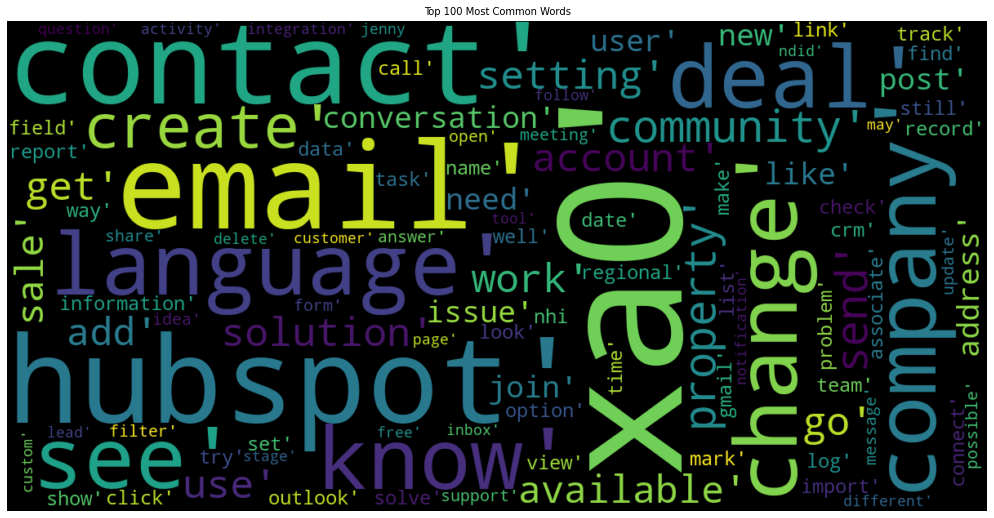

In [ ]:
allwords = []
for wordlist in fin:
    allwords += wordlist
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1200, height=600).generate(str(mostcommon))
fig = plt.figure(figsize=(23,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=10)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
FreqDist(allwords).most_common(100)

[('hubspot', 32597),
 ('email', 31683),
 ('contact', 27924),
 ('language', 13550),
 ('deal', 13292),
 ('company', 12963),
 ('know', 12181),
 ('change', 11511),
 ('see', 11429),
 ('create', 10751),
 ('community', 10694),
 ('send', 9715),
 ('property', 9330),
 ('setting', 9115),
 ('solution', 8654),
 ('go', 8650),
 ('use', 8544),
 ('work', 8312),
 ('get', 8190),
 ('account', 8168),
 ('available', 8163),
 ('sale', 7923),
 ('add', 7871),
 ('conversation', 7816),
 ('post', 7732),
 ('user', 7717),
 ('like', 7628),
 ('issue', 7320),
 ('new', 7081),
 ('join', 6802),
 ('need', 6785),
 ('address', 6696),
 ('regional', 6683),
 ('way', 6607),
 ('crm', 6554),
 ('set', 6044),
 ('log', 5985),
 ('solve', 5591),
 ('time', 5362),
 ('look', 5348),
 ('information', 5329),
 ('list', 5298),
 ('team', 5214),
 ('track', 5186),
 ('show', 5111),
 ('view', 4930),
 ('record', 4923),
 ('make', 4893),
 ('date', 4892),
 ('find', 4880),
 ('field', 4550),
 ('import', 4547),
 ('connect', 4488),
 ('check', 4485),
 ('try

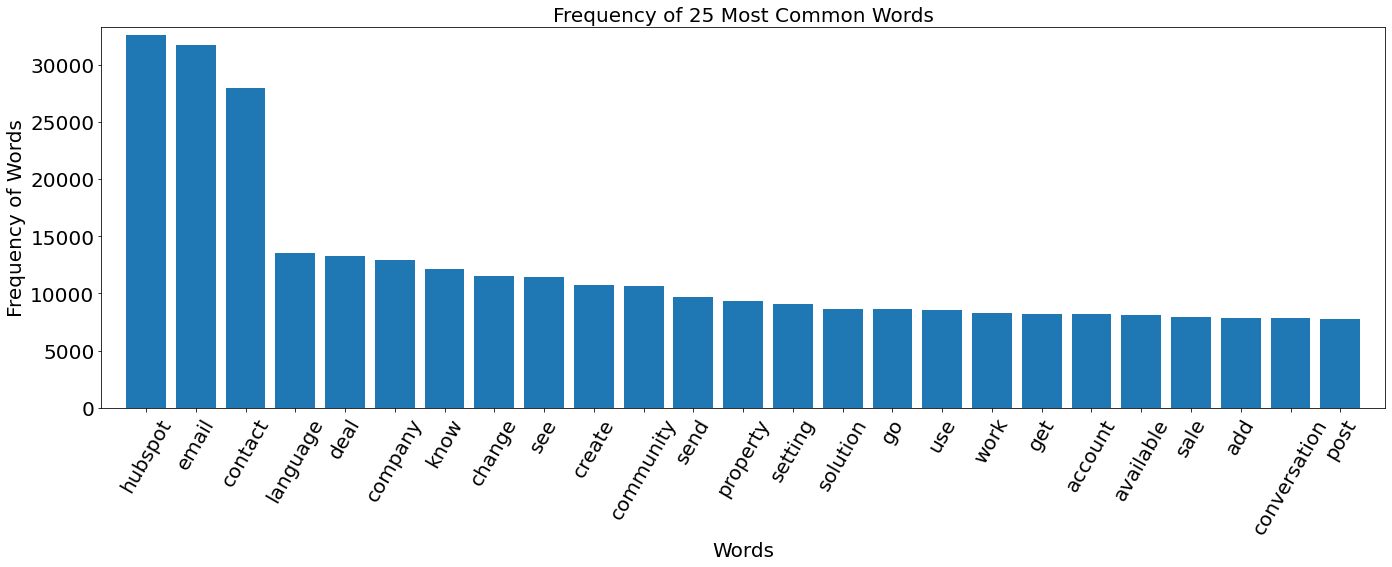

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(23,7))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words', fontsize=20)
plt.show()

In [ ]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=10)
plt.tight_layout(pad=0)
plt.show()

------------------


In [ ]:
df = pd.read_csv("/path/to/hubspot/CRM.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop_duplicates(inplace=True, ignore_index=True)
df.head()

,Title,Content,Answers
0,Slack vs. Microsoft Teams: which is better?,\nThis week we're discussing Slack vs. Microsoft Teams. \n \nAs we continue to operate in a more...,"['\nI want to tag in a few contributors to get their input on this matter!\n\xa0\n@Andi7,\xa0@NC..."
1,Filtering contact by company type,\nIt would seem logical that I should be able to filter my Contacts list by Company Type. In ot...,"[""\nHubSpot smart lists are designed to solve exactly this scenario.-1- Use company criteria to ..."
2,How to tie a contact to a deal or company and know his role,\nCurrently I can find no way to identify why the contact is part of a deal. His title doesn't h...,"[""\nHi\xa0@bdesilva\xa0\n\xa0\nThat's an interesting challenge, where one contact can have diffe..."
3,How to remove closed deals from deal preview in a contact profile?,\nHi! I want to be able to remove closed won or closed lost deals from the deal preview in a con...,"['\nHi\xa0@tbls-amanda,\xa0\n\xa0\nCurrently it is not possible to hide closed deals from the co..."
4,"Integrating deals information and company records , when deals enters a particular stage",\nI wanted to associate a deal with a company.Our company records features client records and su...,[]


In [ ]:
for col in df.columns:
    print(col, df[col].isnull().sum())

Title 0
Content 0
Answers 0


In [ ]:
df['tokenized_title'] = df['Title'].apply(word_tokenize)
df['tokenized_content'] = df['Content'].apply(word_tokenize)
df["tokenized_content"]

In [ ]:
df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [word.lower() for word in x])
df['tokenized_content'] = df['tokenized_content'].apply(lambda x: [word.lower() for word in x])
punc = string.punctuation
df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [word for word in x if word not in punc])
df['tokenized_content'] = df['tokenized_content'].apply(lambda x: [word for word in x if word not in punc])
stop_words = set(stopwords.words('english'))
stop_words.update(["n't","``","''","'s","2","...","'re"])
df['tokenized_title'] = df['tokenized_title'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokenized_content'] = df['tokenized_content'].apply(lambda x: [word for word in x if word not in stop_words])
df[["tokenized_title","tokenized_content"]].head()

In [ ]:
df['pos_tags_title'] = df['tokenized_title'].apply(nltk.tag.pos_tag)
df['pos_tags_content'] = df['tokenized_content'].apply(nltk.tag.pos_tag)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos_title'] = df['pos_tags_title'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df['wordnet_pos_content'] = df['pos_tags_content'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

wnl = WordNetLemmatizer()
df['lemmatized_title'] = df['wordnet_pos_title'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df['lemmatized_content'] = df['wordnet_pos_content'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

In [ ]:
df[["lemmatized_title","lemmatized_content"]].head()

,lemmatized_title,lemmatized_content
0,"[slack, vs., microsoft, team, well]","[week, discuss, slack, vs., microsoft, team, continue, operate, remote, friendly, world, communi..."
1,"[filter, contact, company, type]","[would, seem, logical, able, filter, contact, list, company, type, word, may, want, see, list, c..."
2,"[tie, contact, deal, company, know, role]","[currently, find, way, identify, contact, part, deal, title, help, role, deal, close, process, n..."
3,"[remove, closed, deal, deal, preview, contact, profile]","[hi, want, able, remove, close, close, lost, deal, deal, preview, contact, profile, make, diffic..."
4,"[integrate, deal, information, company, record, deal, enters, particular, stage]","[wanted, associate, deal, company.our, company, record, feature, client, record, supplier, recor..."


In [ ]:
# words = df['lemmatized_title']
allwords = []
for wordlist in df['lemmatized_title']:
    allwords += wordlist
for wordlist in df['lemmatized_content']:
    allwords += wordlist
print(allwords)

In [ ]:
FreqDist(allwords).most_common(10)

[('contact', 7331),
 ('company', 3916),
 ('hubspot', 3658),
 ('email', 3429),
 ('deal', 3301),
 ('go', 2528),
 ('create', 2099),
 ('solution', 2072),
 ('property', 1928),
 ('solve', 1903)]

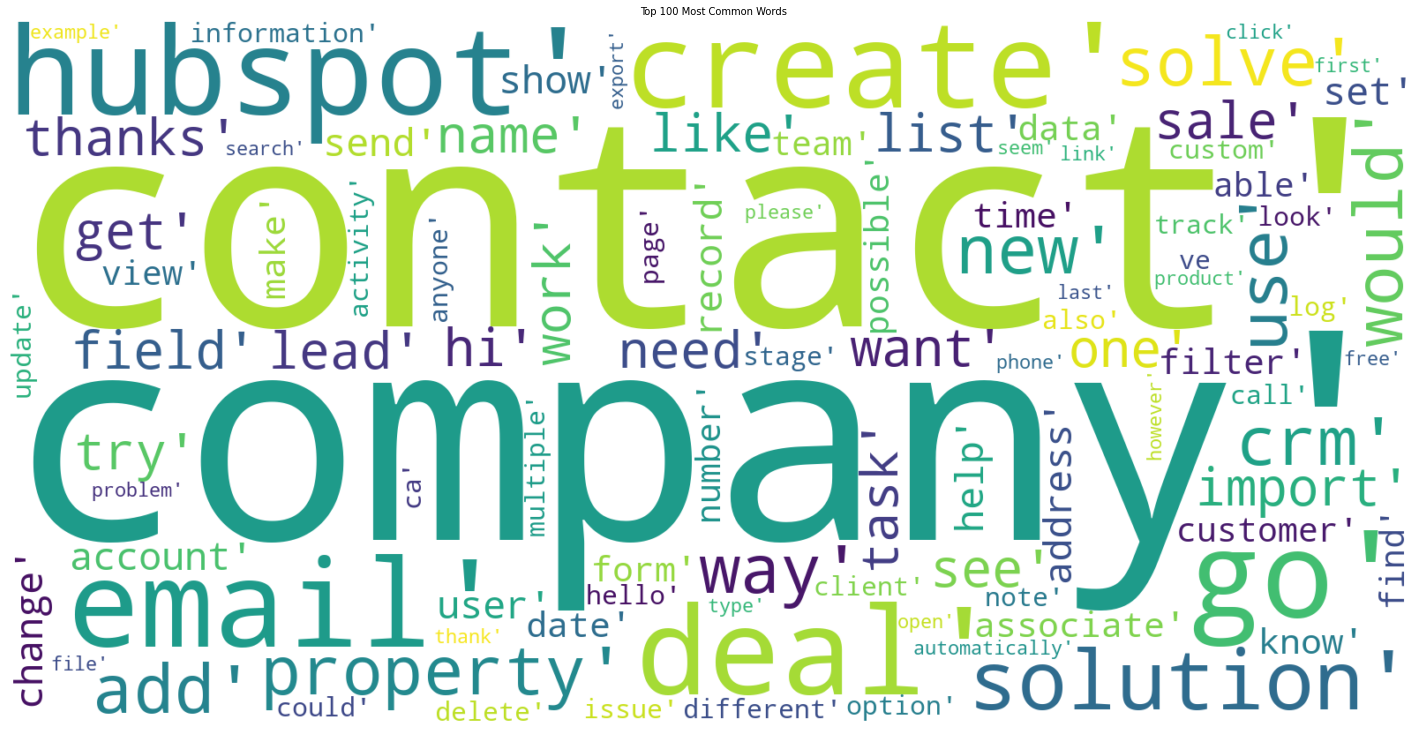

In [ ]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=10)
plt.tight_layout(pad=0)
plt.show()

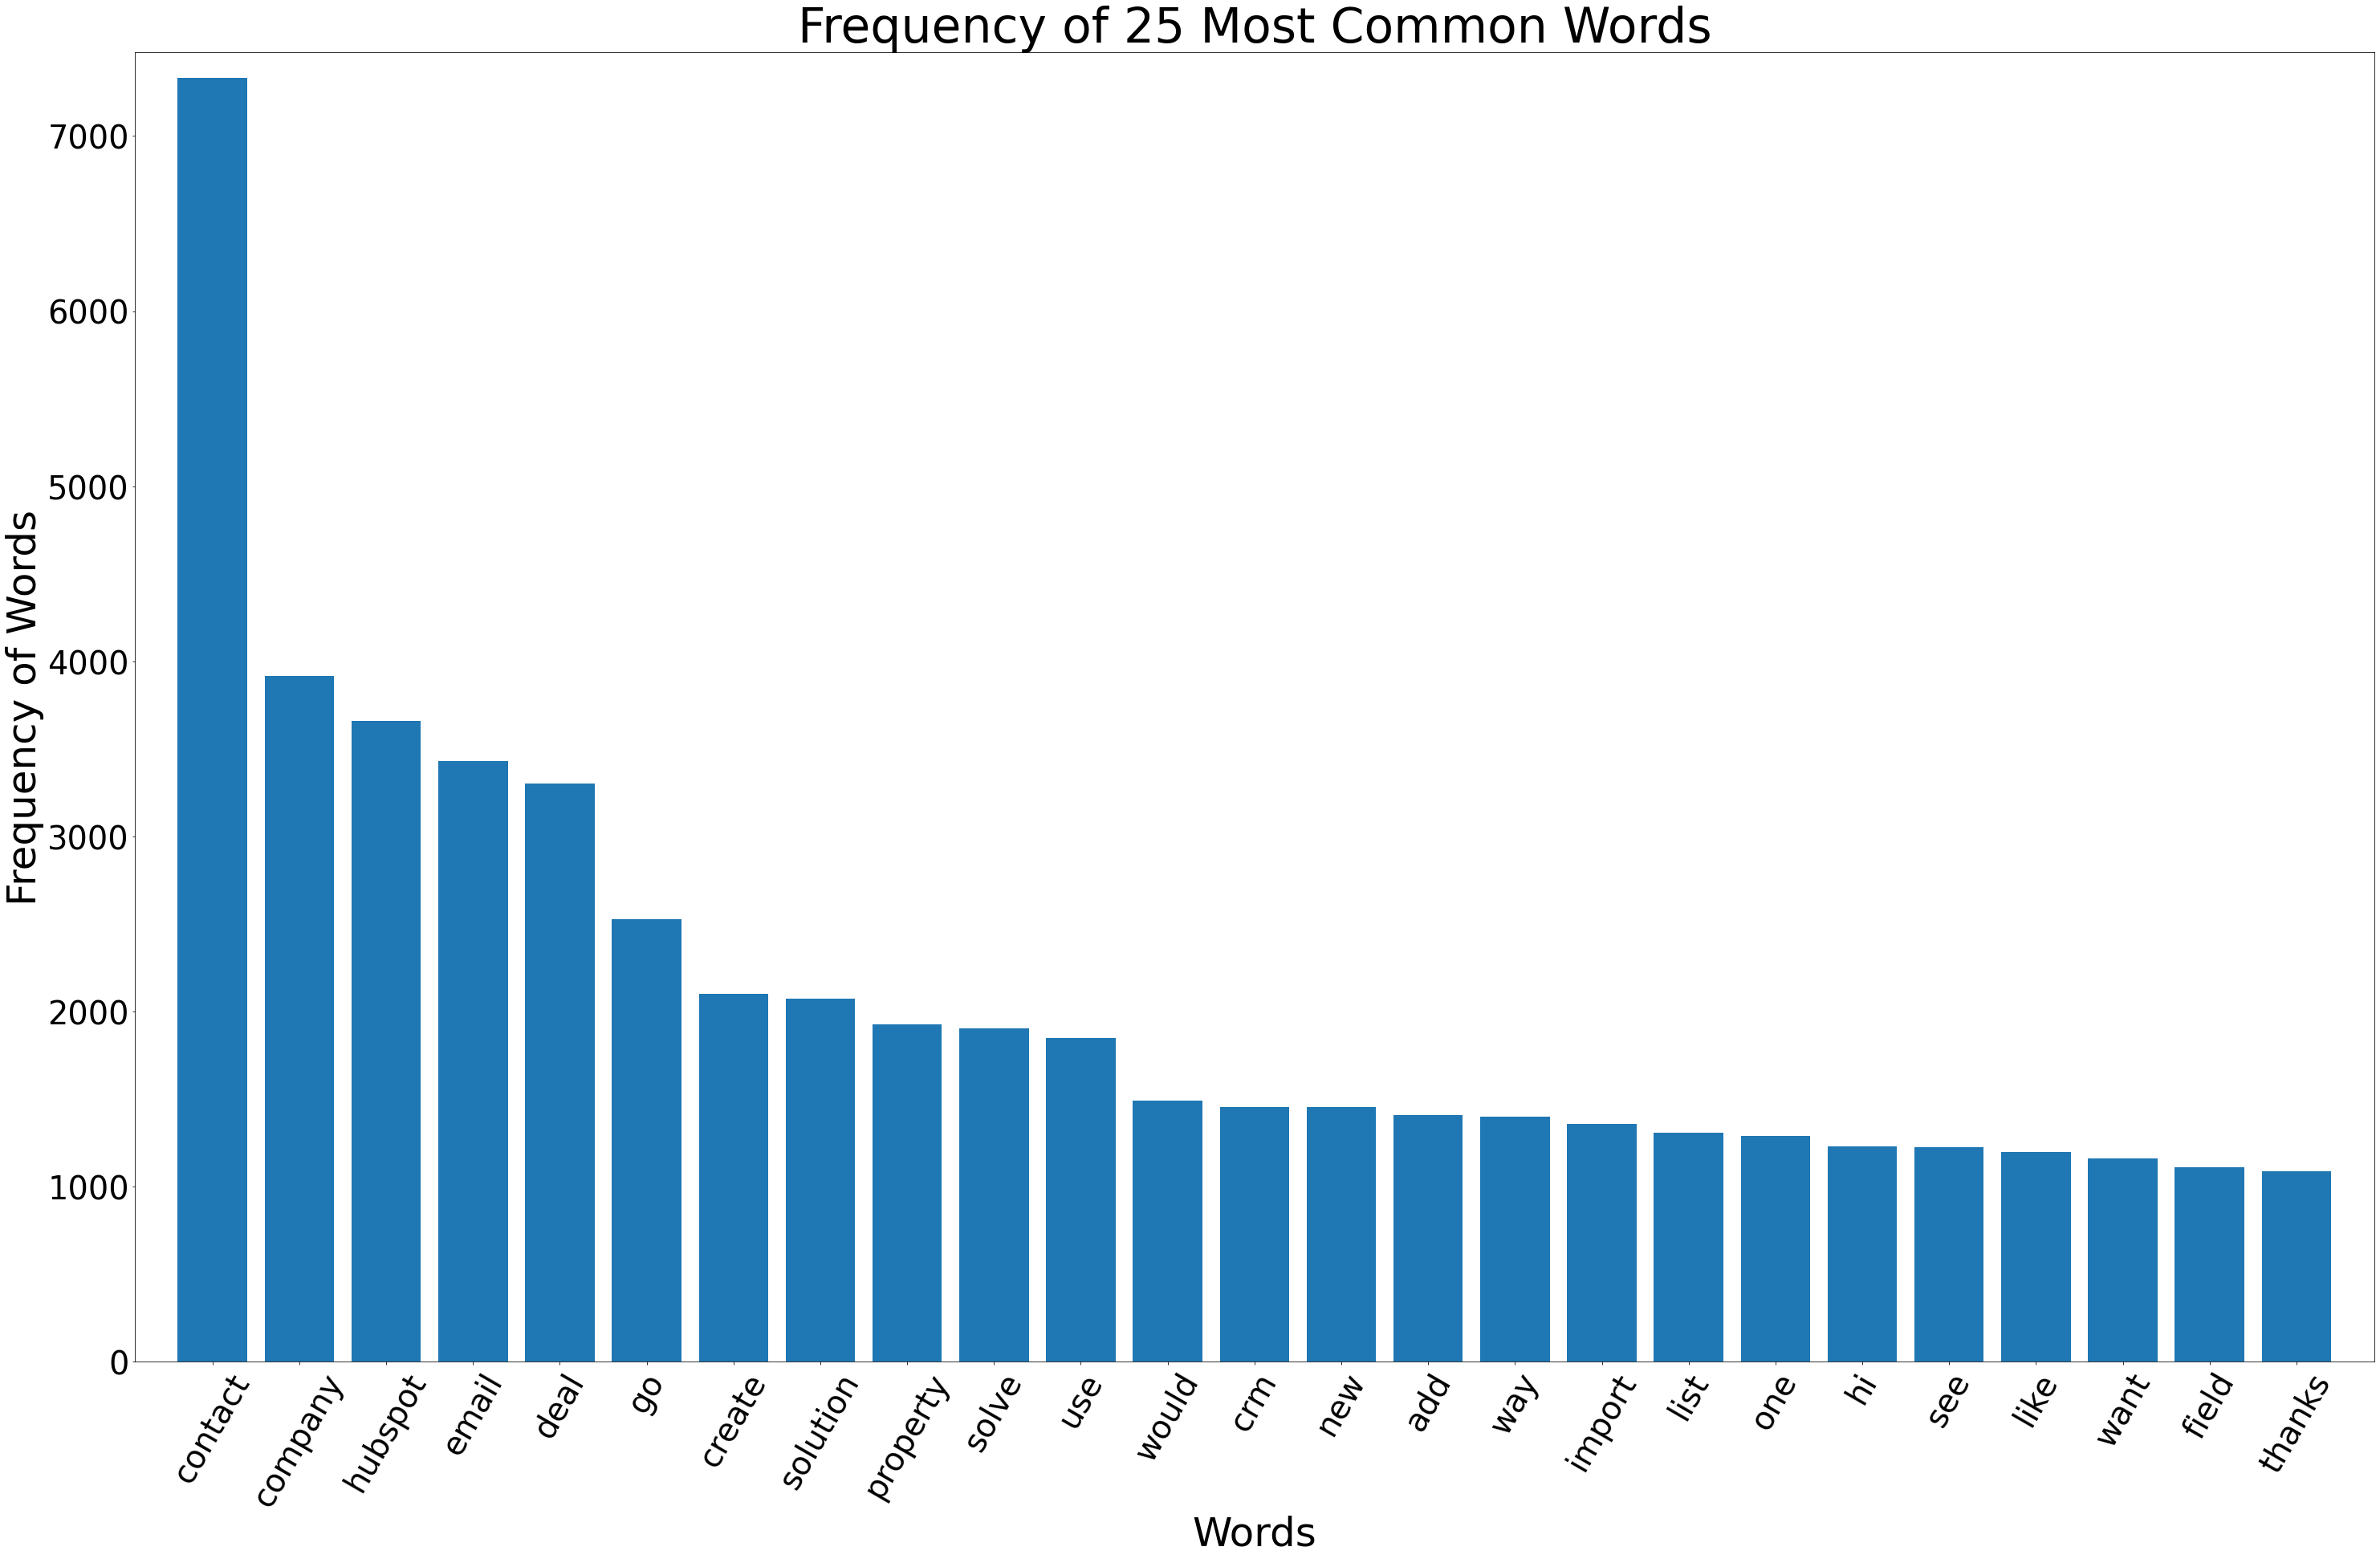

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [ ]:
#avg length of titles
avg_words_title = 0
avg_chars_title = 0
avg_words_content = 0
avg_chars_content = 0
avg_ans = 0
for row in df.iterrows():
  avg_words_title+=len(row[1]["tokenized_title"])
  avg_chars_title+=len(row[1]["Title"])
  avg_words_content+=len(row[1]["tokenized_content"])
  avg_chars_content+=len(row[1]["Content"])
  avg_ans+=len(eval(row[1]["Answers"]))
  # break
print("avg_words_title: ",avg_words_title/df.shape[0])
print("avg_chars_title: ",avg_chars_title/df.shape[0])
print("avg_words_content: ",avg_words_content/df.shape[0])
print("avg_chars_content: ",avg_chars_content/df.shape[0])
print("avg_ans: ",avg_ans/df.shape[0])

avg_words_title:  4.61824833225737
avg_chars_title:  41.74542715730579
avg_words_content:  38.77706046911986
avg_chars_content:  435.49128469980633
avg_ans:  3.290510006455778


In [ ]:
# list(set(lst1) & set(lst2))

In [ ]:
df['lemma_str_title'] = [' '.join(map(str,l)) for l in df['lemmatized_title']]
df['lemma_str_content'] = [' '.join(map(str,l)) for l in df['lemmatized_content']]

In [ ]:
df['lemma_str'] = df['lemma_str_title']+df['lemma_str_content']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

In [ ]:
# LDA

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tfidf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tfidf_feature_names, no_top_words)

Topic 0:
vendor contacted purchase partner count enough party ever dynamic google
Topic 1:
task filter date note contact activity sort go last list
Topic 2:
quote restore period delete account hub id timeline application main
Topic 3:
import file csv upload phone number attachment excel format error
Topic 4:
contact company deal property create hubspot go solution field solve
Topic 5:
sequence personal reminder manager less respond response workflows queue end
Topic 6:
email contact hubspot crm send address go use log company
Topic 7:
parent child merge monthly reporting revenue entire break duplicate agent
Topic 8:
image signature preview beta adjust www obviously size visible updated
Topic 9:
source city ad john facebook state original lead medium www


In [ ]:
# NMF

nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
hubspot crm use account sale user customer free form team
Topic 1:
email send address log open track gmail notification com reply
Topic 2:
deal stage pipeline associate close create amount product way move
Topic 3:
company associate name domain record parent child multiple one work
Topic 4:
import file csv data error name excel list upload column
Topic 5:
contact list add create new go solution solve export see
Topic 6:
task create complete queue assign reminder time go list solve
Topic 7:
property custom field create value option select dropdown add type
Topic 8:
date activity filter last note call log show see time
Topic 9:
lead status stage lifecycle form change go solution solve source


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tfidf, tfidf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  45.756757
6       0.648955  71.707100       2        1  33.103936
1      71.019684   9.971006       3        1   4.667925
3       3.785981  33.185135       4        1   3.588481
7     -42.666500  -9.222070       5        1   2.401437
9      -3.621689 -43.526516       6        1   2.262868
2      -3.632402  -4.171708       7        1   2.118299
8     -36.584400  35.804413       8        1   2.082296
5      44.391380  50.615383       9        1   2.029078
0      40.235809 -31.591665      10        1   1.988924, topic_info=          Term        Freq       Total Category  logprob  loglift
346     import  159.000000  159.000000  Default  30.0000  30.0000
644   sequence   81.000000   81.000000  Default  29.0000  29.0000
716       task  107.000000  107.000000  Default  28.0000  28.0000
278       file   81.000000   81.000000  Default  27.0000  27.0000
344      image   57.000000   57.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
585   recently    0.407151   13.503441  Topic10  -6.8342   0.4161
534  potential    0.407149    9.370232  Topic10  -6.8342   0.7815
378       john    0.407147   29.767329  Topic10  -6.8342  -0.3744
559   prospect    0.407146   20.856946  Topic10  -6.8342  -0.0187
433      maybe    0.407146   11.712927  Topic10  -6.8342   0.5583

[542 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.775253     000
0         2  0.077525     000
5         4  0.848954     200
9         1  0.313728     500
9         4  0.418304     500
...     ...       ...     ...
806       2  0.263613   would
806       3  0.021089   would
809       2  0.702789     www
809       6  0.117131     www
814       2  0.819302  zapier

[719 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 2, 4, 8, 10, 3, 9, 6, 1])